# HW4 [Deception] PART 2 -- Check with Myle Data

## STEP 1: GET THAT DATA

In [73]:
import os
def get_data(file, path):
    f=open(path+file)
    data = f.read()
    f.close()
    return data
    
def get_data_from_files(path):
    results = [get_data(file, path) for file in os.listdir(path)]
    return results

# pos = get_data_from_files('../pos_cornell//')
# neg = get_data_from_files('../neg_cornell/')

# pos = get_data_from_files('../hw4_lie_false/')
# neg = get_data_from_files('../hw4_lie_true/')

## TRUE IS NEG!!!!
neg = get_data_from_files('../myle_pos_deceptive/')
pos = get_data_from_files('../myle_pos_truthful/')
neg2 = get_data_from_files('../myle_neg_deceptive/')
pos2 = get_data_from_files('../myle_neg_truthful/')

In [74]:
import pandas as pd
neg_df = pd.DataFrame(neg)
pos_df = pd.DataFrame(pos)
pos_df['PoN'] = 'P'
neg_df['PoN'] = 'N'
neg_df2 = pd.DataFrame(neg2)
pos_df2 = pd.DataFrame(pos2)
pos_df2['PoN'] = 'P'
neg_df2['PoN'] = 'N'
all_df = neg_df.append(pos_df)
all_df2 = neg_df2.append(pos_df2)
all_df = all_df.append(all_df2)
all_df.reset_index(drop=True,inplace=True)
# all_df2.reset_index(drop=True,inplace=True)
all_df[:-5]

0 PoN
0    I traveled to Chicago with my husband for a ro...   N
1    I stayed in the Sofitel Chicago Water Tower ho...   N
2    This hotel was gorgeous! I really enjoyed my s...   N
3    This is an absolutely exquisite hotel, at a gr...   N
4    I recently traveled up to Chicago for business...   N
..                                                 ...  ..
310  It's not a bad hotel. It's just so...disappoin...   P
311  My wife and I brought our daughter downtown fo...   P
312  Excellent Hotel ! Rooms and service were great...   P
313  Had a week long stay at the Hilton on south Mi...   P
314  We stayed at the James hotel for a 40th birthd...   P

[315 rows x 2 columns]

## STEP 2: TOKENIZE

In [75]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

### -- 2a by sentence

In [76]:
def get_sentence_tokens(review):
    return sent_tokenize(review)
    
all_df['sentences'] = all_df.apply(lambda x: get_sentence_tokens(x[0]), axis=1)
all_df['num_sentences'] = all_df.apply(lambda x: len(x['sentences']), axis=1)

### -- 2b by word

In [77]:
def get_tokens(sentence):
    tokens = word_tokenize(sentence)
    clean_tokens = [word.lower() for word in tokens if word.isalpha()]
    return clean_tokens

all_df['tokens'] = all_df.apply(lambda x: get_tokens(x[0]), axis=1)
all_df['num_tokens'] = all_df.apply(lambda x: len(x['tokens']), axis=1)

In [78]:
all_df[:3]

0 PoN  \
0  I traveled to Chicago with my husband for a ro...   N   
1  I stayed in the Sofitel Chicago Water Tower ho...   N   
2  This hotel was gorgeous! I really enjoyed my s...   N   

                                           sentences  num_sentences  \
0  [I traveled to Chicago with my husband for a r...              6   
1  [I stayed in the Sofitel Chicago Water Tower h...              6   
2  [This hotel was gorgeous!, I really enjoyed my...              7   

                                              tokens  num_tokens  
0  [i, traveled, to, chicago, with, my, husband, ...          68  
1  [i, stayed, in, the, sofitel, chicago, water, ...         129  
2  [this, hotel, was, gorgeous, i, really, enjoye...          69

### -- 2c Remove if tokens < 1

In [79]:
all_df = all_df.drop(all_df[all_df.num_tokens < 1].index)
all_df[:3]

0 PoN  \
0  I traveled to Chicago with my husband for a ro...   N   
1  I stayed in the Sofitel Chicago Water Tower ho...   N   
2  This hotel was gorgeous! I really enjoyed my s...   N   

                                           sentences  num_sentences  \
0  [I traveled to Chicago with my husband for a r...              6   
1  [I stayed in the Sofitel Chicago Water Tower h...              6   
2  [This hotel was gorgeous!, I really enjoyed my...              7   

                                              tokens  num_tokens  
0  [i, traveled, to, chicago, with, my, husband, ...          68  
1  [i, stayed, in, the, sofitel, chicago, water, ...         129  
2  [this, hotel, was, gorgeous, i, really, enjoye...          69

## STEP 3: EXPERIMENT
#### Experiment with: stopwords, stemming, lemming etc.

### -- 3a remove english stopwords

In [80]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
def remove_stopwords(sentence):
    filtered_text = []
    for word in sentence:
        if word not in stop_words:
            filtered_text.append(word)
    return filtered_text
all_df['no_sw'] = all_df.apply(lambda x: remove_stopwords(x['tokens']),axis=1)
all_df['num_no_sw'] = all_df.apply(lambda x: len(x['no_sw']),axis=1)

In [81]:
all_df[:3]

0 PoN  \
0  I traveled to Chicago with my husband for a ro...   N   
1  I stayed in the Sofitel Chicago Water Tower ho...   N   
2  This hotel was gorgeous! I really enjoyed my s...   N   

                                           sentences  num_sentences  \
0  [I traveled to Chicago with my husband for a r...              6   
1  [I stayed in the Sofitel Chicago Water Tower h...              6   
2  [This hotel was gorgeous!, I really enjoyed my...              7   

                                              tokens  num_tokens  \
0  [i, traveled, to, chicago, with, my, husband, ...          68   
1  [i, stayed, in, the, sofitel, chicago, water, ...         129   
2  [this, hotel, was, gorgeous, i, really, enjoye...          69   

                                               no_sw  num_no_sw  
0  [traveled, chicago, husband, romantic, weekend...         40  
1  [stayed, sofitel, chicago, water, tower, hotel...         71  
2  [hotel, gorgeous, really, enjoyed, stay, defin...         36

### -- 3b get stems for both tokens and no_sw

In [82]:
from nltk.stem import PorterStemmer
def get_stems(sentence):
    ps = PorterStemmer()
    return [ps.stem(w) for w in sentence]
    
all_df['stemmed'] = all_df.apply(lambda x: get_stems(x['tokens']),axis=1)
all_df['stemmed_no_sw'] = all_df.apply(lambda x: get_stems(x['no_sw']),axis=1)

In [83]:
all_df[:3]

0 PoN  \
0  I traveled to Chicago with my husband for a ro...   N   
1  I stayed in the Sofitel Chicago Water Tower ho...   N   
2  This hotel was gorgeous! I really enjoyed my s...   N   

                                           sentences  num_sentences  \
0  [I traveled to Chicago with my husband for a r...              6   
1  [I stayed in the Sofitel Chicago Water Tower h...              6   
2  [This hotel was gorgeous!, I really enjoyed my...              7   

                                              tokens  num_tokens  \
0  [i, traveled, to, chicago, with, my, husband, ...          68   
1  [i, stayed, in, the, sofitel, chicago, water, ...         129   
2  [this, hotel, was, gorgeous, i, really, enjoye...          69   

                                               no_sw  num_no_sw  \
0  [traveled, chicago, husband, romantic, weekend...         40   
1  [stayed, sofitel, chicago, water, tower, hotel...         71   
2  [hotel, gorgeous, really, enjoyed, stay, defin...         36   

                                             stemmed  \
0  [i, travel, to, chicago, with, my, husband, fo...   
1  [i, stay, in, the, sofitel, chicago, water, to...   
2  [thi, hotel, wa, gorgeou, i, realli, enjoy, my...   

                                       stemmed_no_sw  
0  [travel, chicago, husband, romant, weekend, aw...  
1  [stay, sofitel, chicago, water, tower, hotel, ...  
2  [hotel, gorgeou, realli, enjoy, stay, definit,...

### -- 3c get lemmas for both tokens and no_sw

In [84]:
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemmas(sentence):
    lem = WordNetLemmatizer() 
    return [lem.lemmatize(w) for w in sentence]
    
all_df['lemmed'] = all_df.apply(lambda x: get_lemmas(x['tokens']),axis=1)
all_df['lemmed_no_sw'] = all_df.apply(lambda x: get_lemmas(x['no_sw']),axis=1)

In [85]:
all_df[:3]

0 PoN  \
0  I traveled to Chicago with my husband for a ro...   N   
1  I stayed in the Sofitel Chicago Water Tower ho...   N   
2  This hotel was gorgeous! I really enjoyed my s...   N   

                                           sentences  num_sentences  \
0  [I traveled to Chicago with my husband for a r...              6   
1  [I stayed in the Sofitel Chicago Water Tower h...              6   
2  [This hotel was gorgeous!, I really enjoyed my...              7   

                                              tokens  num_tokens  \
0  [i, traveled, to, chicago, with, my, husband, ...          68   
1  [i, stayed, in, the, sofitel, chicago, water, ...         129   
2  [this, hotel, was, gorgeous, i, really, enjoye...          69   

                                               no_sw  num_no_sw  \
0  [traveled, chicago, husband, romantic, weekend...         40   
1  [stayed, sofitel, chicago, water, tower, hotel...         71   
2  [hotel, gorgeous, really, enjoyed, stay, defin...         36   

                                             stemmed  \
0  [i, travel, to, chicago, with, my, husband, fo...   
1  [i, stay, in, the, sofitel, chicago, water, to...   
2  [thi, hotel, wa, gorgeou, i, realli, enjoy, my...   

                                       stemmed_no_sw  \
0  [travel, chicago, husband, romant, weekend, aw...   
1  [stay, sofitel, chicago, water, tower, hotel, ...   
2  [hotel, gorgeou, realli, enjoy, stay, definit,...   

                                              lemmed  \
0  [i, traveled, to, chicago, with, my, husband, ...   
1  [i, stayed, in, the, sofitel, chicago, water, ...   
2  [this, hotel, wa, gorgeous, i, really, enjoyed...   

                                        lemmed_no_sw  
0  [traveled, chicago, husband, romantic, weekend...  
1  [stayed, sofitel, chicago, water, tower, hotel...  
2  [hotel, gorgeous, really, enjoyed, stay, defin...

In [86]:
all_df['pos'] = all_df.apply(lambda x: nltk.pos_tag(x['tokens']),axis=1)
all_df['pos_no_sw'] = all_df.apply(lambda x: nltk.pos_tag(x['no_sw']),axis=1)

In [87]:
def get_pos_dict(pos_tuple):
    pos_dict = {}
    for t in pos_tuple:
        if t[1] in pos_dict.keys():
            pos_dict[t[1]] += 1
        else:
            pos_dict.update({t[1]: 1})
    return pos_dict

all_df['pos_dict'] = all_df.apply(lambda x: get_pos_dict(x['pos']), axis=1)
all_df['pos_dict_no_sw'] = all_df.apply(lambda x: get_pos_dict(x['pos_no_sw']), axis=1)
all_df[:3]

0 PoN  \
0  I traveled to Chicago with my husband for a ro...   N   
1  I stayed in the Sofitel Chicago Water Tower ho...   N   
2  This hotel was gorgeous! I really enjoyed my s...   N   

                                           sentences  num_sentences  \
0  [I traveled to Chicago with my husband for a r...              6   
1  [I stayed in the Sofitel Chicago Water Tower h...              6   
2  [This hotel was gorgeous!, I really enjoyed my...              7   

                                              tokens  num_tokens  \
0  [i, traveled, to, chicago, with, my, husband, ...          68   
1  [i, stayed, in, the, sofitel, chicago, water, ...         129   
2  [this, hotel, was, gorgeous, i, really, enjoye...          69   

                                               no_sw  num_no_sw  \
0  [traveled, chicago, husband, romantic, weekend...         40   
1  [stayed, sofitel, chicago, water, tower, hotel...         71   
2  [hotel, gorgeous, really, enjoyed, stay, defin...         36   

                                             stemmed  \
0  [i, travel, to, chicago, with, my, husband, fo...   
1  [i, stay, in, the, sofitel, chicago, water, to...   
2  [thi, hotel, wa, gorgeou, i, realli, enjoy, my...   

                                       stemmed_no_sw  \
0  [travel, chicago, husband, romant, weekend, aw...   
1  [stay, sofitel, chicago, water, tower, hotel, ...   
2  [hotel, gorgeou, realli, enjoy, stay, definit,...   

                                              lemmed  \
0  [i, traveled, to, chicago, with, my, husband, ...   
1  [i, stayed, in, the, sofitel, chicago, water, ...   
2  [this, hotel, wa, gorgeous, i, really, enjoyed...   

                                        lemmed_no_sw  \
0  [traveled, chicago, husband, romantic, weekend...   
1  [stayed, sofitel, chicago, water, tower, hotel...   
2  [hotel, gorgeous, really, enjoyed, stay, defin...   

                                                 pos  \
0  [(i, NN), (traveled, VBD), (to, TO), (chicago,...   
1  [(i, JJ), (stayed, VBD), (in, IN), (the, DT), ...   
2  [(this, DT), (hotel, NN), (was, VBD), (gorgeou...   

                                           pos_no_sw  \
0  [(traveled, VBN), (chicago, JJ), (husband, NN)...   
1  [(stayed, JJ), (sofitel, NN), (chicago, NN), (...   
2  [(hotel, NN), (gorgeous, JJ), (really, RB), (e...   

                                            pos_dict  \
0  {'NN': 18, 'VBD': 6, 'TO': 1, 'VB': 3, 'IN': 6...   
1  {'JJ': 19, 'VBD': 6, 'IN': 16, 'DT': 14, 'NN':...   
2  {'DT': 9, 'NN': 15, 'VBD': 6, 'JJ': 10, 'RB': ...   

                                      pos_dict_no_sw  
0  {'VBN': 1, 'JJ': 6, 'NN': 16, 'RB': 4, 'MD': 2...  
1  {'JJ': 15, 'NN': 29, 'CD': 1, 'NNS': 11, 'RB':...  
2  {'NN': 15, 'JJ': 9, 'RB': 6, 'VBN': 1, 'VBG': ...

In [88]:
# def get_bow_from_tokens(df, column):
#     all_column_data = ' '.join(df[column].tolist())
#     all_column_fd = Counter(all_column_data.split())
#     return all_column_fd

# # bow = get_bow_from_column(all_df, 'diy_cleaner')
# # bow =
from collections import Counter
all_df['bow'] = all_df.apply(lambda x: Counter(x['tokens']), axis=1)
all_df['bow_no_sw'] = all_df.apply(lambda x: Counter(x['no_sw']), axis=1)
all_df[:3]

0 PoN  \
0  I traveled to Chicago with my husband for a ro...   N   
1  I stayed in the Sofitel Chicago Water Tower ho...   N   
2  This hotel was gorgeous! I really enjoyed my s...   N   

                                           sentences  num_sentences  \
0  [I traveled to Chicago with my husband for a r...              6   
1  [I stayed in the Sofitel Chicago Water Tower h...              6   
2  [This hotel was gorgeous!, I really enjoyed my...              7   

                                              tokens  num_tokens  \
0  [i, traveled, to, chicago, with, my, husband, ...          68   
1  [i, stayed, in, the, sofitel, chicago, water, ...         129   
2  [this, hotel, was, gorgeous, i, really, enjoye...          69   

                                               no_sw  num_no_sw  \
0  [traveled, chicago, husband, romantic, weekend...         40   
1  [stayed, sofitel, chicago, water, tower, hotel...         71   
2  [hotel, gorgeous, really, enjoyed, stay, defin...         36   

                                             stemmed  \
0  [i, travel, to, chicago, with, my, husband, fo...   
1  [i, stay, in, the, sofitel, chicago, water, to...   
2  [thi, hotel, wa, gorgeou, i, realli, enjoy, my...   

                                       stemmed_no_sw  \
0  [travel, chicago, husband, romant, weekend, aw...   
1  [stay, sofitel, chicago, water, tower, hotel, ...   
2  [hotel, gorgeou, realli, enjoy, stay, definit,...   

                                              lemmed  \
0  [i, traveled, to, chicago, with, my, husband, ...   
1  [i, stayed, in, the, sofitel, chicago, water, ...   
2  [this, hotel, wa, gorgeous, i, really, enjoyed...   

                                        lemmed_no_sw  \
0  [traveled, chicago, husband, romantic, weekend...   
1  [stayed, sofitel, chicago, water, tower, hotel...   
2  [hotel, gorgeous, really, enjoyed, stay, defin...   

                                                 pos  \
0  [(i, NN), (traveled, VBD), (to, TO), (chicago,...   
1  [(i, JJ), (stayed, VBD), (in, IN), (the, DT), ...   
2  [(this, DT), (hotel, NN), (was, VBD), (gorgeou...   

                                           pos_no_sw  \
0  [(traveled, VBN), (chicago, JJ), (husband, NN)...   
1  [(stayed, JJ), (sofitel, NN), (chicago, NN), (...   
2  [(hotel, NN), (gorgeous, JJ), (really, RB), (e...   

                                            pos_dict  \
0  {'NN': 18, 'VBD': 6, 'TO': 1, 'VB': 3, 'IN': 6...   
1  {'JJ': 19, 'VBD': 6, 'IN': 16, 'DT': 14, 'NN':...   
2  {'DT': 9, 'NN': 15, 'VBD': 6, 'JJ': 10, 'RB': ...   

                                      pos_dict_no_sw  \
0  {'VBN': 1, 'JJ': 6, 'NN': 16, 'RB': 4, 'MD': 2...   
1  {'JJ': 15, 'NN': 29, 'CD': 1, 'NNS': 11, 'RB':...   
2  {'NN': 15, 'JJ': 9, 'RB': 6, 'VBN': 1, 'VBG': ...   

                                                 bow  \
0  {'i': 1, 'traveled': 1, 'to': 1, 'chicago': 2,...   
1  {'i': 3, 'stayed': 1, 'in': 1, 'the': 9, 'sofi...   
2  {'this': 2, 'hotel': 2, 'was': 6, 'gorgeous': ...   

                                           bow_no_sw  
0  {'traveled': 1, 'chicago': 2, 'husband': 1, 'r...  
1  {'stayed': 1, 'sofitel': 1, 'chicago': 1, 'wat...  
2  {'hotel': 2, 'gorgeous': 1, 'really': 1, 'enjo...

In [89]:
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']

big_bow = [item for review in all_df['bow'].tolist() for item in review]
big_bow_n = [item for review in all_df_n['bow'].tolist() for item in review]
big_bow_p = [item for review in all_df_p['bow'].tolist() for item in review]

df = pd.DataFrame.from_dict(Counter(big_bow), orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})

df_n = pd.DataFrame.from_dict(Counter(big_bow_n), orient='index').reset_index()
df_n = df_n.rename(columns={'index':'word', 0:'count'})

df_p = pd.DataFrame.from_dict(Counter(big_bow_p), orient='index').reset_index()
df_p = df_p.rename(columns={'index':'word', 0:'count'})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


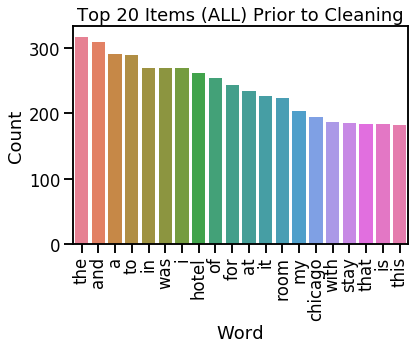

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt 
def bar_plot(df, title): 
    graph = sns.barplot(y = "count", x = "word", data = df, palette = "husl")
    plt.title(title)
    plt.xlabel("Word")
    plt.ylabel("Count")
    sns.set_context("talk")
    plt.xticks(rotation = 90)
    return plt

print(bar_plot(df.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (ALL) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


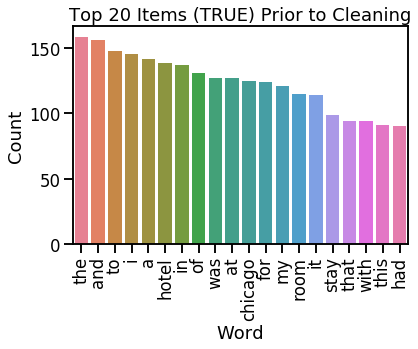

In [91]:
print(bar_plot(df_n.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (TRUE) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


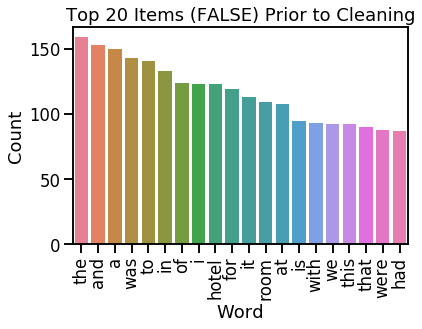

In [92]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (FALSE) Prior to Cleaning"))

In [93]:
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']

big_bow = [item for review in all_df['bow_no_sw'].tolist() for item in review]
big_bow_n = [item for review in all_df_n['bow_no_sw'].tolist() for item in review]
big_bow_p = [item for review in all_df_p['bow_no_sw'].tolist() for item in review]

df = pd.DataFrame.from_dict(Counter(big_bow), orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})

df_n = pd.DataFrame.from_dict(Counter(big_bow_n), orient='index').reset_index()
df_n = df_n.rename(columns={'index':'word', 0:'count'})

df_p = pd.DataFrame.from_dict(Counter(big_bow_p), orient='index').reset_index()
df_p = df_p.rename(columns={'index':'word', 0:'count'})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


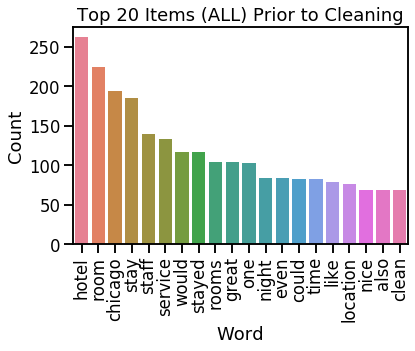

In [94]:
print(bar_plot(df.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (ALL) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


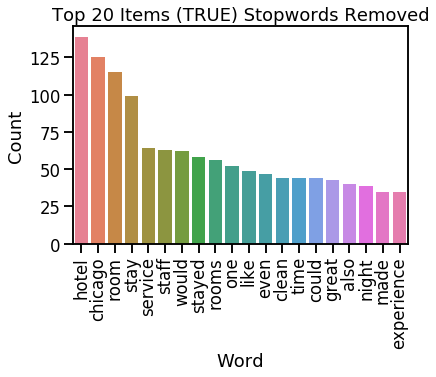

In [95]:
print(bar_plot(df_n.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (TRUE) Stopwords Removed"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


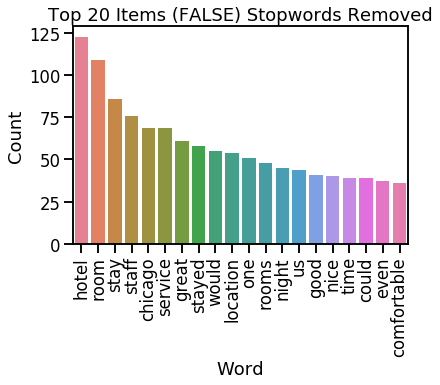

In [96]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (FALSE) Stopwords Removed"))

In [97]:
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']

big_bow = [item for review in all_df['pos_dict'].tolist() for item in review]
big_bow_n = [item for review in all_df_n['pos_dict'].tolist() for item in review]
big_bow_p = [item for review in all_df_p['pos_dict'].tolist() for item in review]

df = pd.DataFrame.from_dict(Counter(big_bow), orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})

df_n = pd.DataFrame.from_dict(Counter(big_bow_n), orient='index').reset_index()
df_n = df_n.rename(columns={'index':'word', 0:'count'})

df_p = pd.DataFrame.from_dict(Counter(big_bow_p), orient='index').reset_index()
df_p = df_p.rename(columns={'index':'word', 0:'count'})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


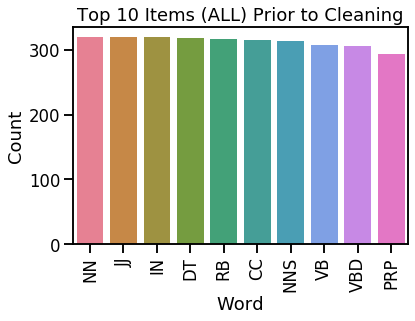

In [98]:
print(bar_plot(df.sort_values(by=["count"], ascending=False)[:10], "Top 10 Items (ALL) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


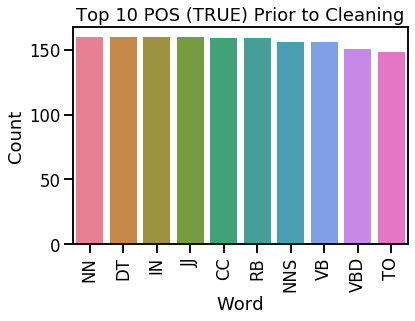

In [99]:
print(bar_plot(df_n.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS (TRUE) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


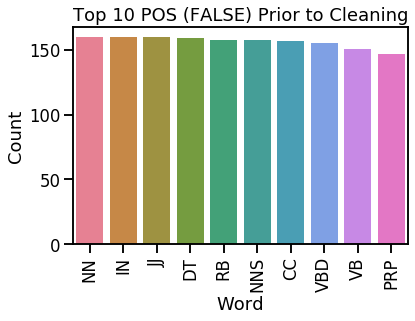

In [100]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS (FALSE) Prior to Cleaning"))

## STEP 4: TEST EXPERIMENTS!!

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
    
# def cross_validation():
    
def get_NB(small_df, labels):
    
    seeds = [109, 210, 420, 19, 7]
    for seed in seeds:
        x_train, x_test, y_train, y_test = train_test_split(small_df.values, labels, test_size=0.3, random_state = seed)

        gnb = GaussianNB()
        gnb.fit(x_train, y_train)
        y_pred = gnb.predict(x_test)
        print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#         print("The accuracy is", accuracy)
        cm = confusion_matrix(y_test, y_pred)
        # confusion_matrix_graph(cm, accuracy, "NB Multinomial Tokenized")
        tn, fp, fn, tp = cm.ravel()
        print(tn, fp, fn, tp)

#### TEST 1: Parts of speech frequency distribution

In [230]:
pos_df = pd.DataFrame(all_df['pos_dict'].tolist(), all_df['PoN'])
pos_df[:3]

NN  VBD   TO   VB  IN  PRP$    DT  JJ   RB   MD  ...  WDT  PDT  JJR  WP  \
PoN                                                   ...                      
N    18  6.0  1.0  3.0   6   3.0   7.0   5  4.0  2.0  ...  NaN  NaN  NaN NaN   
N    28  6.0  2.0  3.0  16   2.0  14.0  19  4.0  1.0  ...  NaN  NaN  NaN NaN   
N    15  6.0  1.0  2.0   3   1.0   9.0  10  8.0  2.0  ...  NaN  NaN  NaN NaN   

     JJS  EX  RBS  NNP  UH  FW  
PoN                             
N    NaN NaN  NaN  NaN NaN NaN  
N    NaN NaN  NaN  NaN NaN NaN  
N    NaN NaN  NaN  NaN NaN NaN  

[3 rows x 31 columns]

In [231]:
pos_df = pos_df.fillna(0).astype(int)
pos_df[:3]

NN  VBD  TO  VB  IN  PRP$  DT  JJ  RB  MD  ...  WDT  PDT  JJR  WP  JJS  \
PoN                                             ...                           
N    18    6   1   3   6     3   7   5   4   2  ...    0    0    0   0    0   
N    28    6   2   3  16     2  14  19   4   1  ...    0    0    0   0    0   
N    15    6   1   2   3     1   9  10   8   2  ...    0    0    0   0    0   

     EX  RBS  NNP  UH  FW  
PoN                        
N     0    0    0   0   0  
N     0    0    0   0   0  
N     0    0    0   0   0  

[3 rows x 31 columns]

In [232]:
get_NB(pos_df, pos_df.index)

Accuracy: 0.5
47 3 45 1
Accuracy: 0.4895833333333333
45 1 48 2
Accuracy: 0.4791666666666667
42 1 49 4
Accuracy: 0.53125
47 0 45 4
Accuracy: 0.40625
35 3 54 4


#### TEST 1b: Normalized parts of speech frequency distribution

In [146]:
pos_df_norm = pos_df.copy()
pos_df_norm = pos_df_norm.apply(lambda x: x/x.sum(), axis=1)
pos_df_norm[:3]
pos_df_norm[1:]
test = pos_df.copy()
test['total'] = test.sum(axis = 1)
test[:3]

NN  VBD  TO  VB  IN  PRP$  DT  JJ  RB  MD  ...  PDT  JJR  WP  JJS  EX  \
PoN                                             ...                          
N    18    6   1   3   6     3   7   5   4   2  ...    0    0   0    0   0   
N    28    6   2   3  16     2  14  19   4   1  ...    0    0   0    0   0   
N    15    6   1   2   3     1   9  10   8   2  ...    0    0   0    0   0   

     RBS  NNP  UH  FW  total  
PoN                           
N      0    0   0   0     68  
N      0    0   0   0    129  
N      0    0   0   0     69  

[3 rows x 32 columns]

In [147]:
pos_df_norm[:3]

NN       VBD        TO        VB        IN      PRP$        DT  \
PoN                                                                         
N    0.264706  0.088235  0.014706  0.044118  0.088235  0.044118  0.102941   
N    0.217054  0.046512  0.015504  0.023256  0.124031  0.015504  0.108527   
N    0.217391  0.086957  0.014493  0.028986  0.043478  0.014493  0.130435   

           JJ        RB        MD  ...  WDT  PDT  JJR   WP  JJS   EX  RBS  \
PoN                                ...                                      
N    0.073529  0.058824  0.029412  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
N    0.147287  0.031008  0.007752  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
N    0.144928  0.115942  0.028986  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     NNP   UH   FW  
PoN                 
N    0.0  0.0  0.0  
N    0.0  0.0  0.0  
N    0.0  0.0  0.0  

[3 rows x 31 columns]

In [190]:
get_NB(pos_df_norm, pos_df.index)

Accuracy: 0.5104166666666666
Accuracy: 0.5
Accuracy: 0.4791666666666667
Accuracy: 0.5208333333333334
Accuracy: 0.3854166666666667


In [191]:
# small_df
small_df = pos_df_norm.filter(['PRP', 'PRP$','NN'])
get_NB(small_df, pos_df.index)

Accuracy: 0.5625
Accuracy: 0.65625
Accuracy: 0.5625
Accuracy: 0.5833333333333334
Accuracy: 0.5416666666666666


In [192]:
pos_df_n = pos_df[pos_df.index == 'N']
pos_df_p = pos_df[pos_df.index == 'P']
print(pos_df['PRP'].sum())
print(pos_df_n['PRP'].sum())
print(pos_df_p['PRP'].sum())
print(pos_df_n['PRP'].sum()/pos_df['PRP'].sum())
print(pos_df_p['PRP'].sum()/pos_df['PRP'].sum())

1968
959
1009
0.4872967479674797
0.5127032520325203


In [193]:
pos_df_n = pos_df[pos_df.index == 'N']
pos_df_p = pos_df[pos_df.index == 'P']
print(pos_df['PRP$'].sum())
print(pos_df_n['PRP$'].sum())
print(pos_df_p['PRP$'].sum())

888
518
370


In [194]:
pos_df_n = pos_df_norm[pos_df_norm.index == 'N']
pos_df_p = pos_df_norm[pos_df_norm.index == 'P']
print(pos_df_norm['PRP'].sum())
print(pos_df_n['PRP'].sum())
print(pos_df_p['PRP'].sum())

13.405406541226437
6.357665198600147
7.04774134262629


In [195]:
pos_df_n = pos_df_norm[pos_df_norm.index == 'N']
pos_df_p = pos_df_norm[pos_df_norm.index == 'P']
print(pos_df_norm['PRP'].mean())
print(pos_df_n['PRP'].mean())
print(pos_df_p['PRP'].mean())

0.041891895441332615
0.039735407491250915
0.044048383391414314


In [196]:
pos_df_n = pos_df_norm[pos_df_norm.index == 'N']
pos_df_p = pos_df_norm[pos_df_norm.index == 'P']
print(pos_df_norm['PRP$'].mean())
print(pos_df_n['PRP$'].mean())
print(pos_df_p['PRP$'].mean())

0.019007323131444483
0.022148272795477524
0.015866373467411442


In [197]:
all_df['pos']

0      [(i, NN), (traveled, VBD), (to, TO), (chicago,...
1      [(i, JJ), (stayed, VBD), (in, IN), (the, DT), ...
2      [(this, DT), (hotel, NN), (was, VBD), (gorgeou...
3      [(this, DT), (is, VBZ), (an, DT), (absolutely,...
4      [(i, NN), (recently, RB), (traveled, VBD), (up...
                             ...                        
315    [(this, DT), (hotel, NN), (was, VBD), (not, RB...
316    [(i, JJ), (stayed, VBD), (at, IN), (the, DT), ...
317    [(we, PRP), (had, VBD), (a, DT), (reservation,...
318    [(i, NN), (am, VBP), (staying, VBG), (here, RB...
319    [(we, PRP), (enjoyed, VBD), (the, DT), (hotel,...
Name: pos, Length: 320, dtype: object

In [198]:
all_df['pos_sent'] = all_df.apply(lambda x: [word[1] for word in x['pos']], axis=1)
all_df['pos_sent_str'] = all_df.apply(lambda x: [' '.join(x['pos_sent'])], axis=1)
all_df['pos_no_sw_sent'] = all_df.apply(lambda x: [word[1] for word in x['pos_no_sw']], axis=1)

In [199]:
type(all_df['pos_sent_str'][1])

list

In [200]:
all_df['pos_sent_bi'] = all_df.apply(lambda x: [b for l in x['pos_sent_str'] for b in zip(l.split(" ")[:-1], l.split(" ")[1:])], axis=1)
# bigrams = [b for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]

In [201]:
# all_df['pos_sent_tri'] = all_df.apply(lambda x: [b for l in x['pos_sent_str'] for b in zip(l.split(" ")[:-1], l.split(" ")[1:])], axis=1)


In [202]:
all_df[:4]

0 PoN  \
0  I traveled to Chicago with my husband for a ro...   N   
1  I stayed in the Sofitel Chicago Water Tower ho...   N   
2  This hotel was gorgeous! I really enjoyed my s...   N   
3  This is an absolutely exquisite hotel, at a gr...   N   

                                           sentences  num_sentences  \
0  [I traveled to Chicago with my husband for a r...              6   
1  [I stayed in the Sofitel Chicago Water Tower h...              6   
2  [This hotel was gorgeous!, I really enjoyed my...              7   
3  [This is an absolutely exquisite hotel, at a g...              6   

                                              tokens  num_tokens  \
0  [i, traveled, to, chicago, with, my, husband, ...          68   
1  [i, stayed, in, the, sofitel, chicago, water, ...         129   
2  [this, hotel, was, gorgeous, i, really, enjoye...          69   
3  [this, is, an, absolutely, exquisite, hotel, a...         110   

                                               no_sw  num_no_sw  \
0  [traveled, chicago, husband, romantic, weekend...         40   
1  [stayed, sofitel, chicago, water, tower, hotel...         71   
2  [hotel, gorgeous, really, enjoyed, stay, defin...         36   
3  [absolutely, exquisite, hotel, great, location...         52   

                                             stemmed  \
0  [i, travel, to, chicago, with, my, husband, fo...   
1  [i, stay, in, the, sofitel, chicago, water, to...   
2  [thi, hotel, wa, gorgeou, i, realli, enjoy, my...   
3  [thi, is, an, absolut, exquisit, hotel, at, a,...   

                                       stemmed_no_sw  ...  \
0  [travel, chicago, husband, romant, weekend, aw...  ...   
1  [stay, sofitel, chicago, water, tower, hotel, ...  ...   
2  [hotel, gorgeou, realli, enjoy, stay, definit,...  ...   
3  [absolut, exquisit, hotel, great, locat, boast...  ...   

                                           bow_no_sw  \
0  {'traveled': 1, 'chicago': 2, 'husband': 1, 'r...   
1  {'stayed': 1, 'sofitel': 1, 'chicago': 1, 'wat...   
2  {'hotel': 2, 'gorgeous': 1, 'really': 1, 'enjo...   
3  {'absolutely': 1, 'exquisite': 1, 'hotel': 3, ...   

                                            pos_sent  \
0  [NN, VBD, TO, VB, IN, PRP$, NN, IN, DT, JJ, NN...   
1  [JJ, VBD, IN, DT, NN, NN, NN, NN, NN, IN, PRP$...   
2  [DT, NN, VBD, JJ, JJ, RB, VBN, PRP$, NN, RB, C...   
3  [DT, VBZ, DT, RB, JJ, NN, IN, DT, JJ, NN, CC, ...   

                                        pos_sent_str  \
0  [NN VBD TO VB IN PRP$ NN IN DT JJ NN RB PRP$ N...   
1  [JJ VBD IN DT NN NN NN NN NN IN PRP$ NN CC CD ...   
2  [DT NN VBD JJ JJ RB VBN PRP$ NN RB CC MD RB VB...   
3  [DT VBZ DT RB JJ NN IN DT JJ NN CC NN NN NNS N...   

                                      pos_no_sw_sent  \
0  [VBN, JJ, NN, JJ, NN, RB, JJ, JJ, NN, NN, NN, ...   
1  [JJ, NN, NN, NN, NN, NN, NN, CD, NNS, JJ, NN, ...   
2  [NN, JJ, RB, VBN, NN, RB, VBG, JJ, NN, JJ, NN,...   
3  [RB, JJ, NN, JJ, NN, VBG, NN, NNS, JJ, NN, RB,...   

                                         pos_sent_bi  \
0  [(NN, VBD), (VBD, TO), (TO, VB), (VB, IN), (IN...   
1  [(JJ, VBD), (VBD, IN), (IN, DT), (DT, NN), (NN...   
2  [(DT, NN), (NN, VBD), (VBD, JJ), (JJ, JJ), (JJ...   
3  [(DT, VBZ), (VBZ, DT), (DT, RB), (RB, JJ), (JJ...   

                                             bow_pos  \
0  {('NN', 'VBD'): 4, ('VBD', 'TO'): 1, ('TO', 'V...   
1  {('JJ', 'VBD'): 1, ('VBD', 'IN'): 1, ('IN', 'D...   
2  {('DT', 'NN'): 8, ('NN', 'VBD'): 6, ('VBD', 'J...   
3  {('DT', 'VBZ'): 1, ('VBZ', 'DT'): 2, ('DT', 'R...   

                                            trigrams  \
0  [(i, traveled, to), (traveled, to, chicago), (...   
1  [(i, stayed, in), (stayed, in, the), (in, the,...   
2  [(this, hotel, was), (hotel, was, gorgeous), (...   
3  [(this, is, an), (is, an, absolutely), (an, ab...   

                                        trigrams_pos  \
0  [(NN, VBD, TO), (VBD, TO, VB), (TO, VB, IN), (...   
1  [(JJ, VBD, IN), (VBD, IN, DT), (IN, DT, NN), (..

In [203]:
test = all_df['pos_sent_str'][1]
test

['JJ VBD IN DT NN NN NN NN NN IN PRP$ NN CC CD NNS JJ NN CC MD RB VB DT NN RB IN JJ NNS DT JJ NNS IN JJ JJ NN CC JJ NNS VBD DT JJ NN TO DT JJ JJ NNS CC NNS IN NN VBP VBN IN JJ NN NNS DT NNS VBD JJ NN CC IN NNS CC JJ NNS JJ IN JJ NN NN CC VB DT NN VBD JJ RB VBN CC VBN IN DT NNS DT NN NN VBD VBG CC DT NN IN PRP$ NN VBD JJ JJ VBN DT NN IN DT NN NN IN DT JJ NN IN TO DT NN IN VBG NN NN CC VBG RP NNS IN VBG PRP VB RB IN NN']

In [204]:
text = ["this is a sentence", "so is this one"]
test2 = ["NN NNS VBP JJ JJ NN NN CC JJ NN JJ VBZ DT NN VBZ RB JJ RB CC JJ VB JJ TO VB DT NN TO VB NN IN RB RB IN", "PRP VBP VBN IN DT JJ NNS DT NN VBP JJ IN PRP$ NNS CC NN TO VB NN NN"]
test1 = ['NN NNS VBP JJ JJ NN NN CC JJ NN JJ VBZ DT NN VBZ RB JJ RB CC JJ VB JJ TO VB DT NN TO VB NN IN RB RB IN PRP VBP VBN IN DT JJ NNS DT NN VBP JJ IN PRP$ NNS CC NN TO VB NN NN']
bigrams = [b for l in test1 for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
print(bigrams)

[('NN', 'NNS'), ('NNS', 'VBP'), ('VBP', 'JJ'), ('JJ', 'JJ'), ('JJ', 'NN'), ('NN', 'NN'), ('NN', 'CC'), ('CC', 'JJ'), ('JJ', 'NN'), ('NN', 'JJ'), ('JJ', 'VBZ'), ('VBZ', 'DT'), ('DT', 'NN'), ('NN', 'VBZ'), ('VBZ', 'RB'), ('RB', 'JJ'), ('JJ', 'RB'), ('RB', 'CC'), ('CC', 'JJ'), ('JJ', 'VB'), ('VB', 'JJ'), ('JJ', 'TO'), ('TO', 'VB'), ('VB', 'DT'), ('DT', 'NN'), ('NN', 'TO'), ('TO', 'VB'), ('VB', 'NN'), ('NN', 'IN'), ('IN', 'RB'), ('RB', 'RB'), ('RB', 'IN'), ('IN', 'PRP'), ('PRP', 'VBP'), ('VBP', 'VBN'), ('VBN', 'IN'), ('IN', 'DT'), ('DT', 'JJ'), ('JJ', 'NNS'), ('NNS', 'DT'), ('DT', 'NN'), ('NN', 'VBP'), ('VBP', 'JJ'), ('JJ', 'IN'), ('IN', 'PRP$'), ('PRP$', 'NNS'), ('NNS', 'CC'), ('CC', 'NN'), ('NN', 'TO'), ('TO', 'VB'), ('VB', 'NN'), ('NN', 'NN')]


In [205]:
# all_bigrams = [bigram for bigram in all_df.pos_sent_bi.tolist()]
# flat_list = [item for sublist in l for item in sublist]
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']
all_bigrams = [bigram for sublist in all_df.pos_sent_bi.tolist() for bigram in sublist]
all_bigrams_n = [bigram for sublist in all_df_n.pos_sent_bi.tolist() for bigram in sublist]
all_bigrams_p = [bigram for sublist in all_df_p.pos_sent_bi.tolist() for bigram in sublist]
all_bigrams[:5]

[('NN', 'VBD'), ('VBD', 'TO'), ('TO', 'VB'), ('VB', 'IN'), ('IN', 'PRP$')]

In [206]:
count = Counter(all_bigrams)
count_n = Counter(all_bigrams_n)
count_p = Counter(all_bigrams_p)

In [207]:
count.most_common()[:5]

import numpy as np

# all_df['bow_v3'] = all_df.apply(lambda x: Counter(casual_tokenize(x['pruned'])), axis=1)
# new_df = pd.DataFrame(all_df['bow_v3'].tolist(), all_df['PoN'])

# most_common_pos = [word[0] for word in big_bow_p.most_common(100)]
# print("Unique values in array1 that are not in array2:")
most_common_n = [word[0] for word in count_n.most_common(10)]
most_common_p = [word[0] for word in count_p.most_common(10)]

neg_notpos = np.setdiff1d(most_common_n, most_common_p)
neg_notpos

# all_bigrams_n

array(['TO', 'VB'], dtype='<U3')

In [208]:
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']

big_bow = [item for review in all_df['pos_sent_bi'].tolist() for item in review]
big_bow_n = [item for review in all_df_n['pos_sent_bi'].tolist() for item in review]
big_bow_p = [item for review in all_df_p['pos_sent_bi'].tolist() for item in review]

df = pd.DataFrame.from_dict(Counter(big_bow), orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})

df_n = pd.DataFrame.from_dict(Counter(big_bow_n), orient='index').reset_index()
df_n = df_n.rename(columns={'index':'word', 0:'count'})

df_p = pd.DataFrame.from_dict(Counter(big_bow_p), orient='index').reset_index()
df_p = df_p.rename(columns={'index':'word', 0:'count'})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


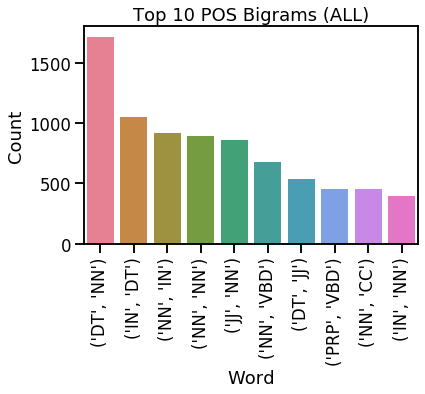

In [209]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS Bigrams (ALL)"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


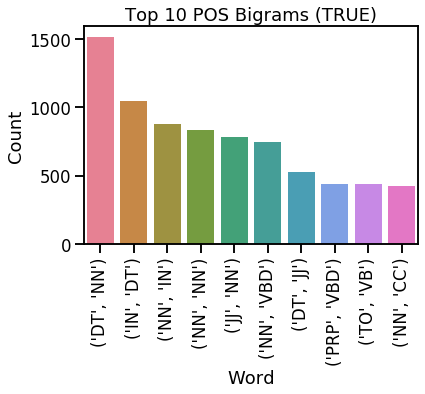

In [210]:
print(bar_plot(df_n.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS Bigrams (TRUE)"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


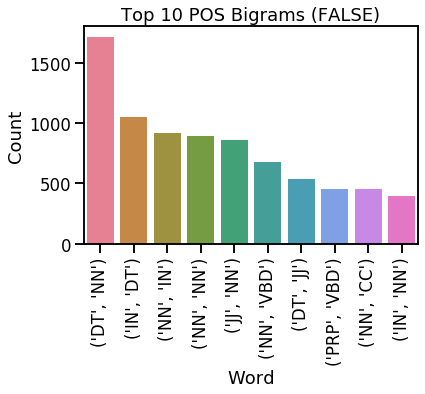

In [211]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS Bigrams (FALSE)"))

In [212]:
all_df['bow_pos'] = all_df.apply(lambda x: Counter(x['pos_sent_bi']), axis=1)

new_df = pd.DataFrame(all_df['bow_pos'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]

(NN, VBD)  (VBD, TO)  (TO, VB)  (VB, IN)  (IN, PRP$)  (PRP$, NN)  \
PoN                                                                     
N            4          1         1         1           1           3   
N            3          0         0         0           2           2   
N            6          0         0         0           0           1   
N            3          1         2         0           2           2   
N           12          0         8         4           3           5   

     (NN, IN)  (IN, DT)  (DT, JJ)  (JJ, NN)  ...  (RBS, PRP)  (PRP, JJR)  \
PoN                                          ...                           
N           3         2         1         1  ...           0           0   
N           6         4         4         7  ...           0           0   
N           0         2         1         1  ...           0           0   
N           5         4         3         6  ...           0           0   
N           6        10         4         8  ...           0           0   

     (JJ, RBS)  (RBS, RB)  (PRP$, TO)  (WRB, VBD)  (CC, JJS)  (MD, DT)  \
PoN                                                                      
N            0          0           0           0          0         0   
N            0          0           0           0          0         0   
N            0          0           0           0          0         0   
N            0          0           0           0          0         0   
N            0          0           0           0          0         0   

     (VBN, MD)  (PRP, RBR)  
PoN                         
N            0           0  
N            0           0  
N            0           0  
N            0           0  
N            0           0  

[5 rows x 553 columns]

In [213]:
get_NB(new_df, new_df.index)

Accuracy: 0.5416666666666666
Accuracy: 0.5208333333333334
Accuracy: 0.4791666666666667
Accuracy: 0.5208333333333334
Accuracy: 0.5833333333333334


In [214]:
bi_df_norm = new_df.copy()
bi_df_norm = bi_df_norm.apply(lambda x: x/x.sum(), axis=1)
# bi_df_norm = bi_df_norm.apply(lambda x: x/x.sum(), axis=1)
bi_df_norm

get_NB(bi_df_norm, bi_df_norm.index)
bi_df_norm

Accuracy: 0.5625
Accuracy: 0.5625
Accuracy: 0.46875
Accuracy: 0.4895833333333333
Accuracy: 0.59375


(NN, VBD)  (VBD, TO)  (TO, VB)  (VB, IN)  (IN, PRP$)  (PRP$, NN)  \
PoN                                                                     
N     0.059701   0.014925  0.014925  0.014925    0.014925    0.044776   
N     0.023438   0.000000  0.000000  0.000000    0.015625    0.015625   
N     0.088235   0.000000  0.000000  0.000000    0.000000    0.014706   
N     0.027523   0.009174  0.018349  0.000000    0.018349    0.018349   
N     0.046875   0.000000  0.031250  0.015625    0.011719    0.019531   
..         ...        ...       ...       ...         ...         ...   
P     0.065574   0.000000  0.000000  0.000000    0.000000    0.000000   
P     0.013793   0.000000  0.006897  0.000000    0.013793    0.006897   
P     0.000000   0.000000  0.007634  0.000000    0.007634    0.007634   
P     0.032258   0.000000  0.012903  0.000000    0.006452    0.006452   
P     0.029412   0.000000  0.029412  0.000000    0.000000    0.000000   

     (NN, IN)  (IN, DT)  (DT, JJ)  (JJ, NN)  ...  (RBS, PRP)  (PRP, JJR)  \
PoN                                          ...                           
N    0.044776  0.029851  0.014925  0.014925  ...         0.0         0.0   
N    0.046875  0.031250  0.031250  0.054688  ...         0.0         0.0   
N    0.000000  0.029412  0.014706  0.014706  ...         0.0         0.0   
N    0.045872  0.036697  0.027523  0.055046  ...         0.0         0.0   
N    0.023438  0.039062  0.015625  0.031250  ...         0.0         0.0   
..        ...       ...       ...       ...  ...         ...         ...   
P    0.032787  0.065574  0.016393  0.000000  ...         0.0         0.0   
P    0.075862  0.062069  0.041379  0.048276  ...         0.0         0.0   
P    0.061069  0.061069  0.022901  0.053435  ...         0.0         0.0   
P    0.064516  0.051613  0.032258  0.025806  ...         0.0         0.0   
P    0.029412  0.000000  0.029412  0.058824  ...         0.0         0.0   

     (JJ, RBS)  (RBS, RB)  (PRP$, TO)  (WRB, VBD)  (CC, JJS)  (MD, DT)  \
PoN                                                                      
N          0.0        0.0         0.0         0.0        0.0       0.0   
N          0.0        0.0         0.0         0.0        0.0       0.0   
N          0.0        0.0         0.0         0.0        0.0       0.0   
N          0.0        0.0         0.0         0.0        0.0       0.0   
N          0.0        0.0         0.0         0.0        0.0       0.0   
..         ...        ...         ...         ...        ...       ...   
P          0.0        0.0         0.0         0.0        0.0       0.0   
P          0.0        0.0         0.0         0.0        0.0       0.0   
P          0.0        0.0         0.0         0.0        0.0       0.0   
P          0.0        0.0         0.0         0.0        0.0       0.0   
P          0.0        0.0         0.0         0.0        0.0       0.0   

     (VBN, MD)  (PRP, RBR)  
PoN                         
N          0.0    0.000000  
N          0.0    0.000000  
N          0.0    0.000000  
N          0.0    0.000000  
N          0.0    0.000000  
..         ...         ...  
P          0.0    0.000000  
P          0.0    0.000000  
P          0.0    0.007634  
P          0.0    0.000000  
P          0.0    0.000000  

[320 rows x 553 columns]

In [215]:
df_p.sort_values(by=["count"], ascending=False)[:20]

word  count
1      (DT, NN)   1719
14     (IN, DT)   1051
3      (NN, IN)    916
2      (NN, NN)    897
8      (JJ, NN)    859
6     (NN, VBD)    676
7      (DT, JJ)    540
30   (PRP, VBD)    458
21     (NN, CC)    451
9      (IN, NN)    398
25     (TO, VB)    374
0     (VBD, DT)    332
32     (RB, JJ)    308
147   (VBD, RB)    281
5    (PRP$, NN)    251
17    (VBD, JJ)    250
13    (NNS, IN)    233
158    (NN, RB)    229
36    (IN, PRP)    229
38     (NN, DT)    214

In [216]:
df_n.sort_values(by=["count"], ascending=False)[:20]

word  count
12     (DT, NN)   1519
7      (IN, DT)   1045
6      (NN, IN)    877
13     (NN, NN)    836
9      (JJ, NN)    782
0     (NN, VBD)    743
8      (DT, JJ)    529
27   (PRP, VBD)    438
2      (TO, VB)    435
49     (NN, CC)    423
61     (IN, NN)    393
5    (PRP$, NN)    377
28    (VBD, RB)    337
57    (VBD, DT)    292
90     (RB, JJ)    284
10     (NN, RB)    241
41    (DT, NNS)    240
4    (IN, PRP$)    226
122   (IN, PRP)    213
43    (VBD, IN)    209

In [217]:
from nltk import word_tokenize 
from nltk.util import ngrams

text = ['cant railway station', 'citadel hotel', 'police stn']
def get_ngram(line, num):
    token = nltk.word_tokenize(line)
    grams = list(ngrams(token, num)) 
    return(grams)

# all_df['trigrams'] = all_df.apply(lambda x: get_ngram(x[0],3), axis=1)
all_df['trigrams'] = all_df.apply(lambda x: get_ngram(' '.join(x['tokens']),3), axis=1)
all_df['trigrams_pos'] = all_df.apply(lambda x: get_ngram(' '.join(x['pos_sent']),3), axis=1)

# ' '.join(all_df['tokens'][1])
                                  
# counter = all_df['trigrams_pos']

In [218]:
all_df['trigrams_feats'] = all_df.apply(lambda x: ['_'.join(trigram) for trigram in x['trigrams_pos']], axis=1)

In [219]:
def flatten_column(df, column):
    return [features for row in df[column].tolist() for features in row]
#     [bigram for sublist in all_df_n.pos_sent_bi.tolist() for bigram in sublist]

flat_trigrams = Counter(flatten_column(all_df, 'trigrams_feats'))
flat_trigrams_n = Counter(flatten_column(all_df[all_df['PoN'] == 'N'], 'trigrams_feats'))
flat_trigrams_p = Counter(flatten_column(all_df[all_df['PoN'] == 'P'], 'trigrams_feats'))

most_common_n = [word[0] for word in flat_trigrams_n.most_common(10)]
most_common_p = [word[0] for word in flat_trigrams_p.most_common(10)]

neg_notpos = np.setdiff1d(most_common_n, most_common_p)
neg_notpos

array(['IN_PRP_$'], dtype='<U9')

In [220]:
all_df['trigrams_feats_bow'] = all_df.apply(lambda x: Counter(x['trigrams_feats']), axis=1)

In [221]:
new_df = pd.DataFrame(all_df['trigrams_feats_bow'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]


NN_VBD_TO  VBD_TO_VB  TO_VB_IN  VB_IN_PRP  IN_PRP_$  PRP_$_NN  $_NN_IN  \
PoN                                                                           
N            1          1         1          1         1         3        2   
N            0          0         0          0         2         2        0   
N            0          0         0          0         0         1        0   
N            0          0         0          0         2         2        1   
N            0          0         3          0         3         5        0   

     NN_IN_DT  IN_DT_JJ  DT_JJ_NN  ...  VBP_VBN_PDT  WP_VBD_NNS  VBZ_VBD_NN  \
PoN                                ...                                        
N           2         1         1  ...            0           0           0   
N           2         1         2  ...            0           0           0   
N           0         1         1  ...            0           0           0   
N           1         2         3  ...            0           0           0   
N           2         2         4  ...            0           0           0   

     DT_WRB_PRP  VBD_PRP_RBR  PRP_RBR_IN  JJ_CC_CD  VBN_VBN_RP  NN_PRP_VBN  \
PoN                                                                          
N             0            0           0         0           0           0   
N             0            0           0         0           0           0   
N             0            0           0         0           0           0   
N             0            0           0         0           0           0   
N             0            0           0         0           0           0   

     PRP_VBN_RB  
PoN              
N             0  
N             0  
N             0  
N             0  
N             0  

[5 rows x 3696 columns]

In [222]:
get_NB(new_df, new_df.index)

Accuracy: 0.5520833333333334
Accuracy: 0.6145833333333334
Accuracy: 0.5520833333333334
Accuracy: 0.5729166666666666
Accuracy: 0.5104166666666666


In [223]:
tri_df_norm = new_df.copy()
tri_df_norm = tri_df_norm.apply(lambda x: x/x.sum(), axis=1)
tri_df_norm

get_NB(tri_df_norm, tri_df_norm.index)
tri_df_norm

Accuracy: 0.53125
Accuracy: 0.6041666666666666
Accuracy: 0.4791666666666667
Accuracy: 0.5833333333333334
Accuracy: 0.5208333333333334


NN_VBD_TO  VBD_TO_VB  TO_VB_IN  VB_IN_PRP  IN_PRP_$  PRP_$_NN   $_NN_IN  \
PoN                                                                            
N     0.014493   0.014493  0.014493   0.014493  0.014493  0.043478  0.028986   
N     0.000000   0.000000  0.000000   0.000000  0.015504  0.015504  0.000000   
N     0.000000   0.000000  0.000000   0.000000  0.000000  0.014706  0.000000   
N     0.000000   0.000000  0.000000   0.000000  0.017857  0.017857  0.008929   
N     0.000000   0.000000  0.011494   0.000000  0.011494  0.019157  0.000000   
..         ...        ...       ...        ...       ...       ...       ...   
P     0.000000   0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
P     0.000000   0.000000  0.000000   0.000000  0.013514  0.006757  0.000000   
P     0.000000   0.000000  0.000000   0.000000  0.007634  0.007634  0.000000   
P     0.000000   0.000000  0.000000   0.000000  0.006452  0.006452  0.000000   
P     0.000000   0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   

     NN_IN_DT  IN_DT_JJ  DT_JJ_NN  ...  VBP_VBN_PDT  WP_VBD_NNS  VBZ_VBD_NN  \
PoN                                ...                                        
N    0.028986  0.014493  0.014493  ...     0.000000    0.000000    0.000000   
N    0.015504  0.007752  0.015504  ...     0.000000    0.000000    0.000000   
N    0.000000  0.014706  0.014706  ...     0.000000    0.000000    0.000000   
N    0.008929  0.017857  0.026786  ...     0.000000    0.000000    0.000000   
N    0.007663  0.007663  0.015326  ...     0.000000    0.000000    0.000000   
..        ...       ...       ...  ...          ...         ...         ...   
P    0.016667  0.000000  0.000000  ...     0.000000    0.000000    0.000000   
P    0.027027  0.027027  0.027027  ...     0.006757    0.006757    0.006757   
P    0.030534  0.007634  0.015267  ...     0.000000    0.000000    0.000000   
P    0.025806  0.019355  0.019355  ...     0.000000    0.000000    0.000000   
P    0.000000  0.000000  0.030303  ...     0.000000    0.000000    0.000000   

     DT_WRB_PRP  VBD_PRP_RBR  PRP_RBR_IN  JJ_CC_CD  VBN_VBN_RP  NN_PRP_VBN  \
PoN                                                                          
N      0.000000     0.000000    0.000000  0.000000    0.000000    0.000000   
N      0.000000     0.000000    0.000000  0.000000    0.000000    0.000000   
N      0.000000     0.000000    0.000000  0.000000    0.000000    0.000000   
N      0.000000     0.000000    0.000000  0.000000    0.000000    0.000000   
N      0.000000     0.000000    0.000000  0.000000    0.000000    0.000000   
..          ...          ...         ...       ...         ...         ...   
P      0.000000     0.000000    0.000000  0.000000    0.000000    0.000000   
P      0.006757     0.000000    0.000000  0.000000    0.000000    0.000000   
P      0.000000     0.007634    0.007634  0.000000    0.000000    0.000000   
P      0.000000     0.000000    0.000000  0.006452    0.006452    0.006452   
P      0.000000     0.000000    0.000000  0.000000    0.000000    0.000000   

     PRP_VBN_RB  
PoN              
N      0.000000  
N      0.000000  
N      0.000000  
N      0.000000  
N      0.000000  
..          ...  
P      0.000000  
P      0.000000  
P      0.000000  
P      0.006452  
P      0.000000  

[320 rows x 3696 columns]

In [224]:
all_df

0 PoN  \
0    I traveled to Chicago with my husband for a ro...   N   
1    I stayed in the Sofitel Chicago Water Tower ho...   N   
2    This hotel was gorgeous! I really enjoyed my s...   N   
3    This is an absolutely exquisite hotel, at a gr...   N   
4    I recently traveled up to Chicago for business...   N   
..                                                 ...  ..   
315  This hotel was not worth it. From the moment w...   P   
316  I stayed at the hotel during the Dave Matthews...   P   
317  We had a reservation for 3 rooms with 5 adults...   P   
318  I am staying here now and actually am compelle...   P   
319  We enjoyed the Hotel Monaco. Great location fo...   P   

                                             sentences  num_sentences  \
0    [I traveled to Chicago with my husband for a r...              6   
1    [I stayed in the Sofitel Chicago Water Tower h...              6   
2    [This hotel was gorgeous!, I really enjoyed my...              7   
3    [This is an absolutely exquisite hotel, at a g...              6   
4    [I recently traveled up to Chicago for busines...             13   
..                                                 ...            ...   
315  [This hotel was not worth it., From the moment...              6   
316  [I stayed at the hotel during the Dave Matthew...              9   
317  [We had a reservation for 3 rooms with 5 adult...              9   
318  [I am staying here now and actually am compell...              6   
319  [We enjoyed the Hotel Monaco., Great location ...              4   

                                                tokens  num_tokens  \
0    [i, traveled, to, chicago, with, my, husband, ...          68   
1    [i, stayed, in, the, sofitel, chicago, water, ...         129   
2    [this, hotel, was, gorgeous, i, really, enjoye...          69   
3    [this, is, an, absolutely, exquisite, hotel, a...         110   
4    [i, recently, traveled, up, to, chicago, for, ...         257   
..                                                 ...         ...   
315  [this, hotel, was, not, worth, it, from, the, ...          62   
316  [i, stayed, at, the, hotel, during, the, dave,...         146   
317  [we, had, a, reservation, for, rooms, with, ad...         132   
318  [i, am, staying, here, now, and, actually, am,...         156   
319  [we, enjoyed, the, hotel, monaco, great, locat...          35   

                                                 no_sw  num_no_sw  \
0    [traveled, chicago, husband, romantic, weekend...         40   
1    [stayed, sofitel, chicago, water, tower, hotel...         71   
2    [hotel, gorgeous, really, enjoyed, stay, defin...         36   
3    [absolutely, exquisite, hotel, great, location...         52   
4    [recently, traveled, chicago, business, terrif...        116   
..                                                 ...        ...   
315  [hotel, worth, moment, walked, hotel, lobby, c...         27   
316  [stayed, hotel, dave, matthews, caravan, tour,...         76   
317  [reservation, rooms, adults, kids, got, rooms,...         58   
318  [staying, actually, compelled, write, review, ...         72   
319  [enjoyed, hotel, monaco, great, location, walk...         19   

                                               stemmed  \
0    [i, travel, to, chicago, with, my, husband, fo...   
1    [i, stay, in, the, sofitel, chicago, water, to...   
2    [thi, hotel, wa, gorgeou, i, realli, enjoy, my...   
3    [thi, is, an, absolut, exquisit, hotel, at, a,...   
4    [i, recent, travel, up, to, chicago, for, busi...   
..                                                 ...   
315  [thi, hotel, wa, not, worth, it, from, the, mo...   
316  [i, stay, at, the, hotel, dure, the, dave, mat...   
317  [we, had, a, reserv, for, room, with, adult, a...   
318  [i, am, stay, here, now, and, actual, am, comp...   
319  [we, enjoy, the, hotel, monaco, great, locat, ...   

                                         stemmed_no_sw  ...  \
0